In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the data
ind_data=pd.read_csv("/content/drive/MyDrive/industrial_safety_and_health_database_with_accidents_description.csv")
ind_data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [4]:
ind_data.shape

(425, 11)

In [5]:
# data preprocessing
ind_data.drop("Unnamed: 0",axis=1,inplace=True)
ind_data = ind_data.rename(columns={'Data': 'Time'})
ind_data.shape

(425, 10)

In [6]:
ind_data['Time'] = pd.to_datetime(ind_data['Time'])

In [7]:
ind_data['year']= ind_data['Time'].dt.year
ind_data['month']= ind_data['Time'].dt.month
ind_data['day']= ind_data['Time'].dt.day
ind_data.head()

,Time,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,year,month,day
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


In [8]:
ind_data.drop("Time",axis=1,inplace=True)
ind_data.drop_duplicates(inplace=True)

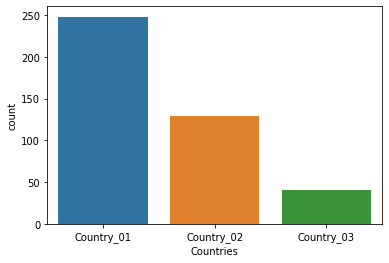

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='Countries',data=ind_data)

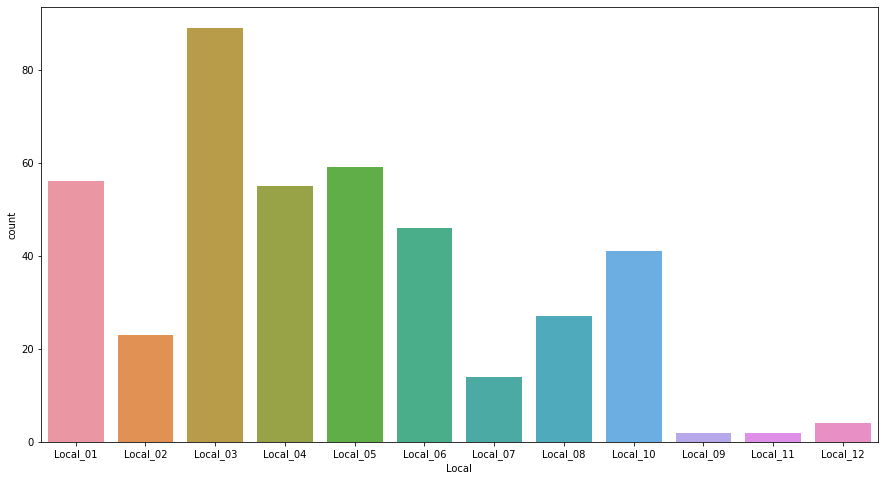

In [10]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(x='Local',data=ind_data)

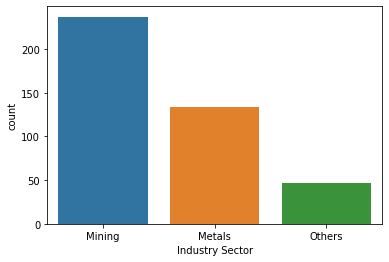

In [11]:
sns.countplot(x='Industry Sector',data=ind_data)

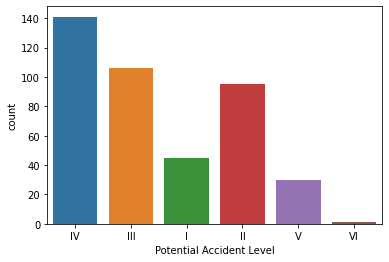

In [12]:
sns.countplot(x='Potential Accident Level',data=ind_data)

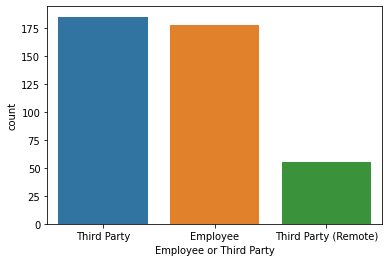

In [13]:
sns.countplot(x='Employee or Third Party',data=ind_data)

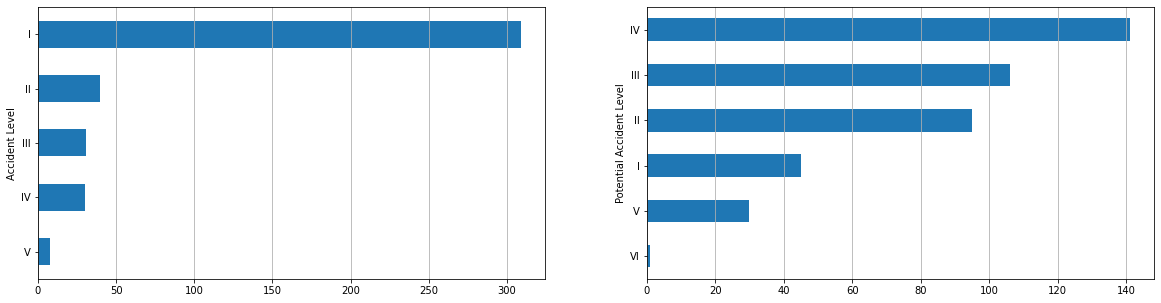

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
ind_data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
ind_data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

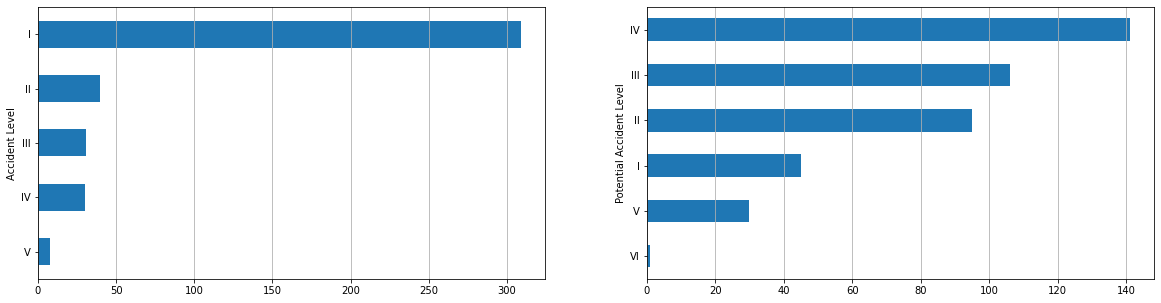

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
ind_data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
ind_data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

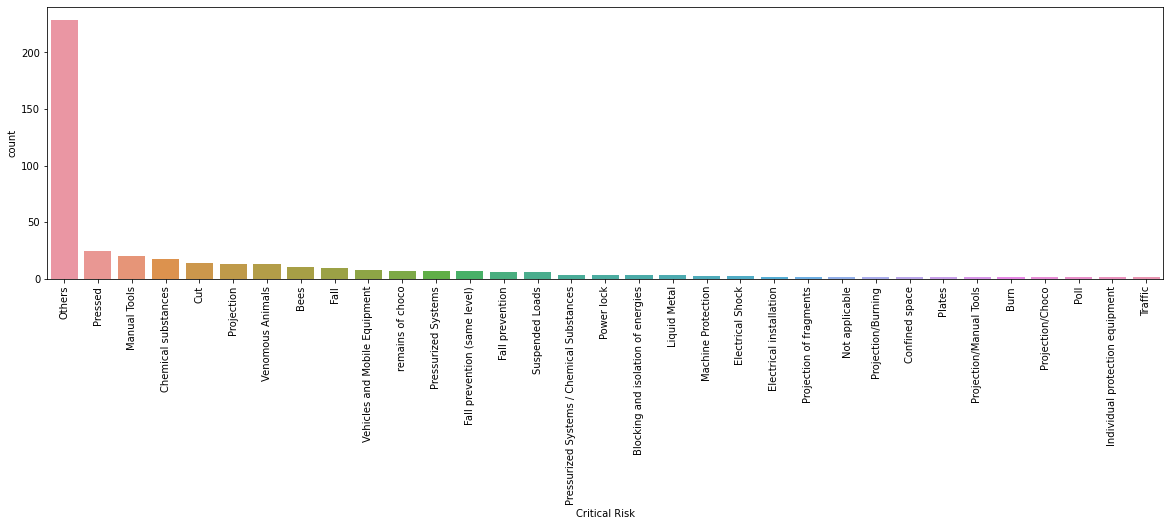

In [16]:
plt.figure(figsize=(20,5))
descending_order = ind_data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=ind_data['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

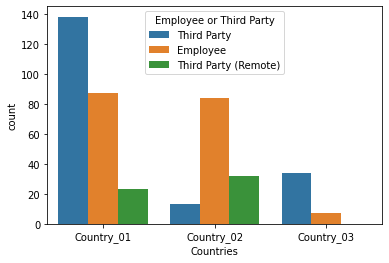

In [17]:
sns.countplot(x="Countries", data=ind_data, hue="Employee or Third Party")

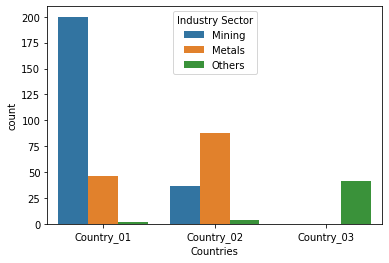

In [18]:
sns.countplot(x="Countries", data=ind_data, hue="Industry Sector")

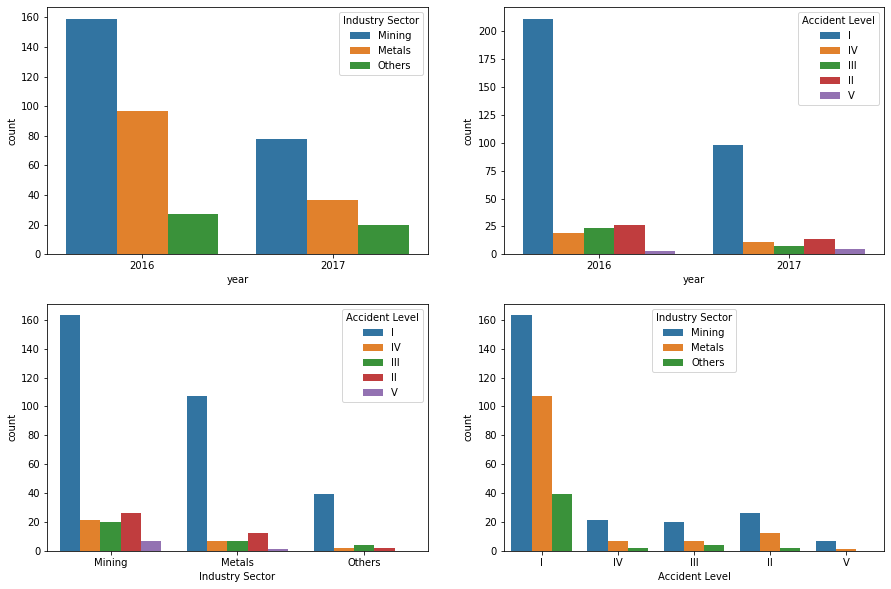

In [19]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=ind_data['year'],hue='Industry Sector',data=ind_data,ax=axs[0][0])
sns.countplot(x=ind_data['year'],hue='Accident Level',data=ind_data,ax=axs[0][1])
sns.countplot(x=ind_data['Industry Sector'],hue='Accident Level',data=ind_data,ax=axs[1][0])
sns.countplot(x=ind_data['Accident Level'],hue='Industry Sector',data=ind_data,ax=axs[1][1])

In [20]:
def count_value(c):
    count= c.value_counts()
    return count

In [21]:
print(count_value(ind_data["Industry Sector"]))
print(count_value(ind_data["Employee or Third Party"]))
print(count_value(ind_data["Genre"]))
print(count_value(ind_data["Potential Accident Level"]))
print(count_value(ind_data["Accident Level"]))

Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64
Third Party             185
Employee                178
Third Party (Remote)     55
Name: Employee or Third Party, dtype: int64
Male      396
Female     22
Name: Genre, dtype: int64
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64
I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64


In [22]:
print(ind_data["Industry Sector"].unique())
print(ind_data["Genre"].unique())
print(ind_data["Employee or Third Party"].unique())
print(ind_data["Critical Risk"].unique())



['Mining' 'Metals' 'Others']
['Male' 'Female']
['Third Party' 'Employee' 'Third Party (Remote)']
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Projection/Manual Tools'
 'Individual protection equipment' 'Electrical Shock'
 'Projection of fragments']


In [23]:
ind_data= pd.get_dummies(ind_data, columns = ['Industry Sector','Employee or Third Party','Genre'])

In [24]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column.
ind_data['Accident Level']= label_encoder.fit_transform(ind_data['Accident Level'])
ind_data['Potential Accident Level']= label_encoder.fit_transform(ind_data['Potential Accident Level'])
  
print(ind_data['Accident Level'].unique())
print(ind_data['Potential Accident Level'].unique())

[0 3 2 1 4]
[3 2 0 1 4 5]


In [25]:
ind_data.shape

(418, 17)

In [26]:
count_value(ind_data["Critical Risk"])

Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Projection                                    13
Venomous Animals                              13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Pressurized Systems                            7
Fall prevention (same level)                   7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Blocking and isolation of energies             3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

In [27]:
counts = ind_data['Critical Risk'].value_counts()
idx = counts[counts.lt(15)].index
ind_data.loc[ind_data['Critical Risk'].isin(idx), 'Critical Risk'] = 'Others_less'

In [28]:
count_value(ind_data["Critical Risk"])

Others                 229
Others_less            128
Pressed                 24
Manual Tools            20
Chemical substances     17
Name: Critical Risk, dtype: int64

In [29]:


ind_data= pd.get_dummies(ind_data, columns = ["Critical Risk"])

In [30]:

# shift column 'Accident Level' to first position
last_column = ind_data.pop('Accident Level')
# insert column using insert(position,column_name,
# first_column) function
ind_data.insert(20, 'Accident Level', last_column)
# shift column 'Potential Accident Level' to first position
last_column1 = ind_data.pop('Potential Accident Level')
# insert column using insert(position,column_name,
# first_column) function
ind_data.insert(20, 'Potential Accident Level', last_column1)
# shift column 'Description' to first position
last_column2 = ind_data.pop('Description')
# insert column using insert(position,column_name,
# first_column) function
ind_data.insert(20, 'Description', last_column2)

In [31]:
ind_data.shape

(418, 21)

In [32]:

ind_data.drop('Genre_Female', axis=1,inplace=True)
ind_data.drop('Employee or Third Party_Third Party (Remote)', axis=1,inplace=True)
ind_data.drop('Industry Sector_Others', axis=1,inplace=True)


In [33]:
import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
text= ind_data[["Description"]]

In [35]:
text["Description"] = text["Description"].str.lower()
text.head()

,Description
0,while removing the drill rod of the jumbo 08 f...
1,during the activation of a sodium sulphide pum...
2,in the sub-station milpo located at level +170...
3,being 9:45 am. approximately in the nv. 1880 c...
4,approximately at 11:45 a.m. in circumstances t...


In [36]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))
                                        
text["Description"] = text["Description"].apply(lambda text: remove_punctuation(text))
text.head()


,Description
0,while removing the drill rod of the jumbo 08 f...
1,during the activation of a sodium sulphide pum...
2,in the substation milpo located at level 170 w...
3,being 945 am approximately in the nv 1880 cx69...
4,approximately at 1145 am in circumstances that...


In [37]:
nltk.download("stopwords")
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [38]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

text["Description"] = text["Description"].apply(lambda text : remove_stopwords(text))
text.head()

,Description
0,removing drill rod jumbo 08 maintenance superv...
1,activation sodium sulphide pump piping uncoupl...
2,substation milpo located level 170 collaborato...
3,945 approximately nv 1880 cx695 ob7 personnel ...
4,approximately 1145 circumstances mechanics ant...


In [39]:
def clean_text(text):
    text = text.strip()
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = text.lower()
    return text
ind_data["Description"] = ind_data["Description"].map(lambda text : clean_text(text))

In [40]:

ind_data.head()

,Countries,Local,year,month,day,Industry Sector_Metals,Industry Sector_Mining,Employee or Third Party_Employee,Employee or Third Party_Third Party,Genre_Male,Critical Risk_Chemical substances,Critical Risk_Manual Tools,Critical Risk_Others,Critical Risk_Others_less,Critical Risk_Pressed,Accident Level,Potential Accident Level,Description
0,Country_01,Local_01,2016,1,1,0,1,0,1,1,0,0,0,0,1,0,3,while removing drill rod jumbo 08 maintenance ...
1,Country_02,Local_02,2016,1,2,0,1,1,0,1,0,0,0,1,0,0,3,during activation sodium sulphide pump piping ...
2,Country_01,Local_03,2016,1,6,0,1,0,0,1,0,1,0,0,0,0,2,in substation milpo located level 170 collabor...
3,Country_01,Local_04,2016,1,8,0,1,0,1,1,0,0,1,0,0,0,0,being 945 approximately nv 1880 cx695 ob7 pers...
4,Country_01,Local_04,2016,1,10,0,1,0,1,1,0,0,1,0,0,3,3,approximately 1145 circumstances mechanics ant...


In [41]:
# change countries to integer type
ind_data['Countries'].str.strip()
ind_data['Local'].str.strip()
ind_data['Countries'] = ind_data['Countries'].str[-1:]
ind_data['Local'] = ind_data['Local'].str[-1:]
ind_data['Countries']=ind_data['Countries'].astype(int)
ind_data['Local']=ind_data['Local'].astype(int)
ind_data.dtypes

Countries                               int64
Local                                   int64
year                                    int64
month                                   int64
day                                     int64
Industry Sector_Metals                  uint8
Industry Sector_Mining                  uint8
Employee or Third Party_Employee        uint8
Employee or Third Party_Third Party     uint8
Genre_Male                              uint8
Critical Risk_Chemical substances       uint8
Critical Risk_Manual Tools              uint8
Critical Risk_Others                    uint8
Critical Risk_Others_less               uint8
Critical Risk_Pressed                   uint8
Accident Level                          int64
Potential Accident Level                int64
Description                            object
dtype: object

In [42]:
# Checking 5 random Description and accident_levels from the data
import random
print('Checking 5 random Descriptions and accident_levels from the data'); 
rands = random.sample(range(1,ind_data.shape[0]), 5)
descriptions, accident_levels = list(ind_data.loc[rands, 'Description']), list(ind_data.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

Checking 5 random Descriptions and accident_levels from the data
Description: on sunday 15 collaborator goes medical center saying accident 3 days ago performed internal maintenance work heat exchangers defined confined space risk burning acid when leaving confined space employee removes protective gloves without passed emergency shower at moment skin contact occurs sulfates generating lesion
accident_level: 0

Description: spillway circumstances worker cleaning use absorbent cloth oil residues right edge atlas axs186 compressor bonnet open functioning rag falls inside ompressor attempt remove hooked fans propeller pulling workers left hand toward propeller causing injury
accident_level: 3

Description: at end loading explosives work front master loader enters verify mooring blasting accessories retiring top 15 hears sound fragments rock rolling support mesh directs gaze towards crown vertical form point small fragment rock 2x3x2cm 36gr passes openings mesh sustaining impact forehead a

Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 200
Description: approximately 1150 circumstances messrs truck crane william de la cruz culminated shipment 03 blocks metal plates approximate weight 1800 kg mr william de cross rigger climbs onto truck remove sling places feet stretcher supported metal plates at moment central part stretcher broken result two feet imprisoned producing injury
accident_level: 3

Description: during activity chuteo ore hopper op5 operator locomotive parks equipment hopper fill first car moment blowing release load mud flow suddenly appears presence rock fragments personnel direction flow covered mud
accident_level: 0

Description: in circumstances two workers abratech company putty work inside conditioning tank 5 meters deep covered platforms metal gratings grating upper part two employees hyt company carried maneuvers transfer pump help manual tick worked hooked beam h dragging pump metal gratings grati

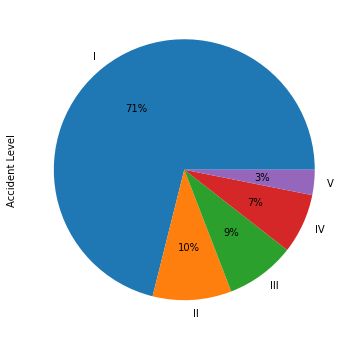

In [43]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 200
print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 200'); 
indexes = list(ind_data.loc[ind_data['Description'].str.len() > 200, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(ind_data.loc[rands, 'Description']), list(ind_data.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('Distributon of accident_level where the length of Description is > 200'); 
_ = ind_data.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

In [44]:
# Can we change potential accident level values
# 1 and 2, 3 and 4 and 4 and 5 one level
print(count_value(ind_data["Potential Accident Level"]))

3    141
2    106
1     95
0     45
4     30
5      1
Name: Potential Accident Level, dtype: int64


In [45]:
ind_datapo= ind_data["Potential Accident Level"]
ind_data["Potential Accident Level"].replace({0:1,1:1,2:2,3:2,4:3,5:3}, inplace=True)

In [46]:
print(count_value(ind_data["Potential Accident Level"]))

2    247
1    140
3     31
Name: Potential Accident Level, dtype: int64


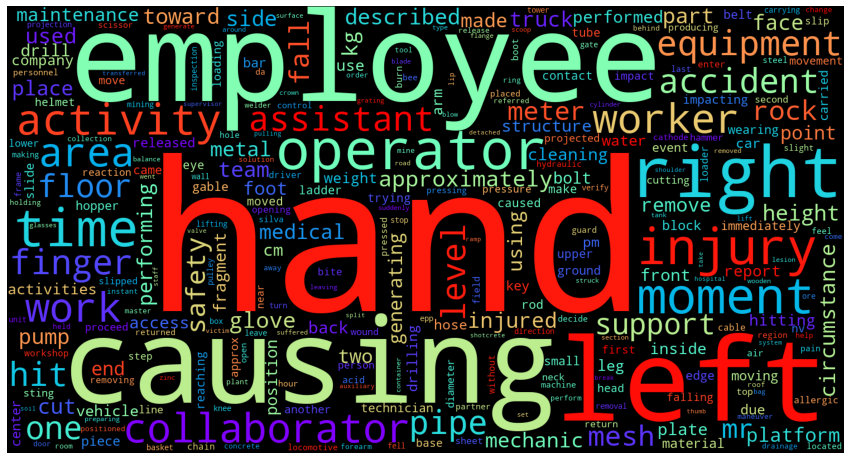

In [47]:
# word cloud
from wordcloud import WordCloud 

wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(ind_data['Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
#here are many body-related, employee related, movement-related, equipment-related and accident-related words.
#Body-related: left, right, hand, finger, face, foot and glove
# Employee-related: employee, operator, collaborator, assistant, worker and mechanic
# Movement-related: fall, hit, lift and slip
# Equipment-related: equipment, pump, meter, drill, truck and tube
# Accident-related: accident, activity, safety, injury, causing


In [49]:
x= ind_data["Description"]
y= ind_data["Potential Accident Level"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y)

In [51]:
pip install catboost

     |████████████████████████████████| 67.4 MB 29 kB/s 


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def ml_models(X_train , y_train, X_test, y_test):

    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier(),'Catboost': CatBoostClassifier()
    }
    
    names = []
    scores = []

    for name, model in models.items():
        clf = model.fit(X_train, y_train)
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result)

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
      
    return result_df 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [54]:
y_train_new = pd.get_dummies(y_train)
y_test_new = pd.get_dummies(y_test)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [56]:
ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

Learning rate set to 0.074823
0:	learn: 1.0704396	total: 97.2ms	remaining: 1m 37s
1:	learn: 1.0432013	total: 134ms	remaining: 1m 6s
2:	learn: 1.0224579	total: 171ms	remaining: 56.9s
3:	learn: 1.0036391	total: 212ms	remaining: 52.8s
4:	learn: 0.9856331	total: 258ms	remaining: 51.3s
5:	learn: 0.9717750	total: 295ms	remaining: 48.9s
6:	learn: 0.9565841	total: 332ms	remaining: 47.1s
7:	learn: 0.9412015	total: 369ms	remaining: 45.8s
8:	learn: 0.9277153	total: 408ms	remaining: 44.9s
9:	learn: 0.9135804	total: 450ms	remaining: 44.6s
10:	learn: 0.9028667	total: 487ms	remaining: 43.8s
11:	learn: 0.8947791	total: 525ms	remaining: 43.2s
12:	learn: 0.8867285	total: 562ms	remaining: 42.7s
13:	learn: 0.8793446	total: 600ms	remaining: 42.2s
14:	learn: 0.8719007	total: 638ms	remaining: 41.9s
15:	learn: 0.8646368	total: 680ms	remaining: 41.8s
16:	learn: 0.8589901	total: 718ms	remaining: 41.5s
17:	learn: 0.8526829	total: 756ms	remaining: 41.2s
18:	learn: 0.8453656	total: 794ms	remaining: 41s
19:	learn: 

,model,accuracy
0,LogReg,0.654762
1,Naive Bayes,0.630952
2,KNN,0.654762
3,SVM,0.678571
4,Decision Tree,0.690476
5,RandomForest,0.630952
6,Bagging,0.630952
7,AdaBoost,0.500000
8,Gradient Boost,0.654762
9,XGBoost,0.547619


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [58]:
y_train_new = pd.get_dummies(y_train)
y_test_new = pd.get_dummies(y_test)

In [59]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten

epochs = 10
batch_size = 12
loss = "categorical_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

bow_model = Sequential()
bow_model.add(Dense(512, activation='relu'))
bow_model.add(Dense(256, activation='relu'))
bow_model.add(Dense(3, activation='softmax'))
bow_model.compile(loss=loss, optimizer=optimizer, metrics= metrics)


In [60]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

filepath="/content/drive/MyDrive/AIML/Capstone project NLP 2/weights.best_{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
filepath="/content/drive/MyDrive/AIML/Capstone project NLP 2/weights.last_auto4.hdf5"
checkpoint_all = ModelCheckpoint(filepath, monitor='val_accuracy', 
                                 verbose=1, save_best_only=False, mode='max')

callbacks_list = [checkpoint, learning_rate_reduction, checkpoint_all]

bow_model.fit(X_train_bow.toarray(), y_train_new, validation_split = 0.2, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)


Epoch 1/10
23/23 [==============================] - 2s 54ms/step - loss: 0.8762 - accuracy: 0.6105 - val_loss: 0.7372 - val_accuracy: 0.6567

Epoch 00001: val_accuracy improved from -inf to 0.65672, saving model to /content/drive/MyDrive/AIML/Capstone project NLP 2/weights.best_01-0.66.hdf5

Epoch 00001: saving model to /content/drive/MyDrive/AIML/Capstone project NLP 2/weights.last_auto4.hdf5
Epoch 2/10
23/23 [==============================] - 1s 41ms/step - loss: 0.1507 - accuracy: 0.9775 - val_loss: 0.7404 - val_accuracy: 0.7015

Epoch 00002: val_accuracy improved from 0.65672 to 0.70149, saving model to /content/drive/MyDrive/AIML/Capstone project NLP 2/weights.best_02-0.70.hdf5

Epoch 00002: saving model to /content/drive/MyDrive/AIML/Capstone project NLP 2/weights.last_auto4.hdf5
Epoch 3/10
23/23 [==============================] - 1s 37ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.8578 - val_accuracy: 0.6418

Epoch 00003: val_accuracy did not improve from 0.70149

Epoch

In [61]:
# LSTM or rnn
x_new1 = ind_data['Description']
y_new1 = ind_data["Accident Level"]# to check the levels of accident changing it 

In [62]:
y_new1.unique()

array([0, 3, 2, 1, 4])

In [63]:
# Divide our data into testing and training sets:
X_train, X_test, y_train, y_test = train_test_split(x_new1, y_new1, test_size = 0.20, random_state = 1, stratify = y_new1)

print('X_train shape : ({0})'.format(X_train.shape[0]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0})'.format(X_test.shape[0]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334)
y_train shape : (334,)
X_test shape : (84)
y_test shape : (84,)


In [66]:
# Convert both the training and test labels into one-hot encoded vectors:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [67]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [68]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

vocab_size: 3099


In [74]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-09-19 16:26:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-19 16:26:04--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-19 16:26:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [75]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open('/content/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [76]:
import os;
import tensorflow as tf
os.environ['PYTHONHASHSEED']=str(7)

# Reproduce the results
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)
   #np.random.seed(7)
   #random.seed(7)
   tf.random.set_seed(7)


In [82]:
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.optimizers import SGD

reset_random_seeds()

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [83]:
print(model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 200)          619800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          336896    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

In [84]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

In [88]:
y_test.shape

(84, 5)

In [89]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train, target_type))
# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp, metrics])

Epoch 1/20
42/42 [==============================] - 8s 183ms/step - loss: 0.9569 - accuracy: 0.7365 - val_loss: 0.9370 - val_accuracy: 0.7381
Epoch 2/20
42/42 [==============================] - 8s 184ms/step - loss: 0.9852 - accuracy: 0.7395 - val_loss: 0.9484 - val_accuracy: 0.7381
Epoch 3/20
42/42 [==============================] - 8s 180ms/step - loss: 0.9953 - accuracy: 0.7395 - val_loss: 0.9437 - val_accuracy: 0.7381
Epoch 4/20
42/42 [==============================] - 8s 182ms/step - loss: 0.9509 - accuracy: 0.7395 - val_loss: 0.9320 - val_accuracy: 0.7381
Epoch 5/20
42/42 [==============================] - 8s 184ms/step - loss: 0.9559 - accuracy: 0.7395 - val_loss: 0.9326 - val_accuracy: 0.7381
Epoch 6/20
42/42 [==============================] - 8s 182ms/step - loss: 0.9559 - accuracy: 0.7395 - val_loss: 0.9260 - val_accuracy: 0.7381
Epoch 7/20
42/42 [==============================] - 8s 182ms/step - loss: 0.9805 - accuracy: 0.7395 - val_loss: 0.9412 - val_accuracy: 0.7381
Epoch 

In [ ]:
# saving bilstm as model for UI
from keras.models import load_model
model.save('BiLSTM_model.h5') 